## Linear models for classification

Linear models are also extensively used for classification. 

**ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b > 0**

Instead of just returning the weighted sum of the features, we threshold the predicted value at zero.

If the function is smaller than zero, we predict the class –1; if it is larger than zero, we predict the class +1. 

This prediction rule is common to all linear models for classification. Again, there are many different ways to find the coefficients (w) and the intercept (b).

For linear models for regression, the output is a linear function of the features: a line, plane, or hyperplane (in higher dimensions). For linear models for classification, the *decision boundary* is a linear function of the input.

In other words, a (binary) linear classifier is **a classifier that separates two classes using a line, a plane, or a hyperplane**.

There are many algorithms for learning linear models. These algorithms all differ in the following two ways:
- The way in which they measure how well a particular combination of coefficients and intercept fits the training data
- If and what kind of regularization they use

Different algorithms choose different ways to measure what “fitting the training set well” means.

The most common linear classification algorithms are :
- **Logistic Regression** : *linear_model.LogisticRegression*
- **Linear SVM** : *svm.LinearSVC*

*Applying these models on the forge datasets*

In [21]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

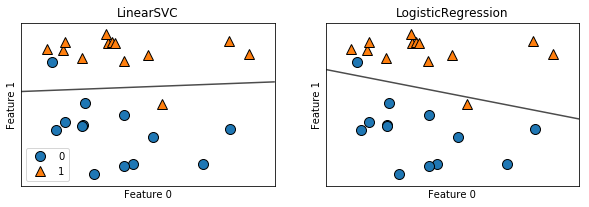

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

The two models come up with similar decision boundaries. Note that both misclassify two of the points. **By default, both models apply an L2 regularization, in the same way that Ridge does for regression.**

For LogisticRegression and LinearSVC the trade-off parameter that determines the strength of the regularization is called *C*, and higher values of C correspond to *less* regularization.

Basically when we use a **high value for the parameter C, Logistic Regression and Linear SVC will try to fit the training set as best as possible**. Whereas **low value of *C* means the model will put more emphasis on finding a coefficient vector (w) that is close to zero**.

Also, **low values of *C* will cause the algorithm to try to adjust to the "majority" of data points**, while using a **higher value of *C* stresses the importance that each individual data point be classified correctly**

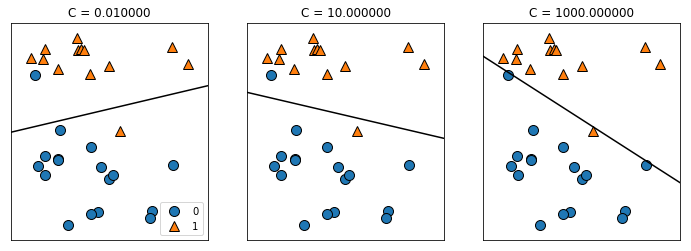

In [5]:
mglearn.plots.plot_linear_svc_regularization()

- On the lefthand side, we have a very small C corresponding to a lot of regularization. The strongly regularized model chooses a relatively horizontal line, misclassifying two points.
- In the center plot, C is slightly higher, and the model focuses more
on the two misclassified samples, tilting the decision boundary. 
-  The model illustrated on the righthand side tries hard to correctly classify all points, but might not capture the overall layout of the classes well. In other words, this model is likely overfitting.

Applying LinearLogistic on **Breast Cancer dataset**

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.941
Test set score: 0.965


Here the default value of C=1 gives a good performance. But as training and test set performance are very close, it is likely that we are underfitting.

In [16]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.951
Test set score: 0.958


Using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intuition that **a more complex model should perform better**.

In [17]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.937
Test set score: 0.930


There are many parallels between linear models for binary classification and linear models for regression.

- In regression, the main difference between the models is the penalty parameter, which influences the regularization and whether the model will use all available features or select only a subset.

### Linear models for multiclass classification

- Many linear classification models are for binary classification only and dont extend to multiclass case (except Linear regression)
- Common technique to extend a binaryclassification algorithm to multiclass is the *one-vs.-rest* approach.
- In this approach, binary model is learned for each class that tried to seperate that class from rest.
- The classifier that has the highest score on its single class wins and this class label is returned as prediction.

Let’s apply the one-vs.-rest method to a simple three-class classification dataset. 

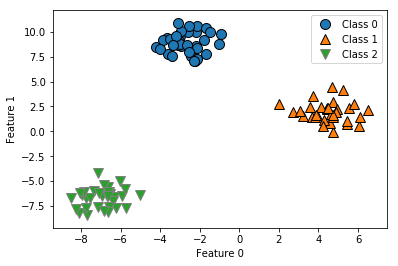

In [18]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [19]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


This means that that each row of coef_ contains the coefficient vector for one of the three classes and each column holds the coefficient value for a specific feature (there are two in this dataset). The intercept is now a one-dimensional array, storing the intercepts for each class.

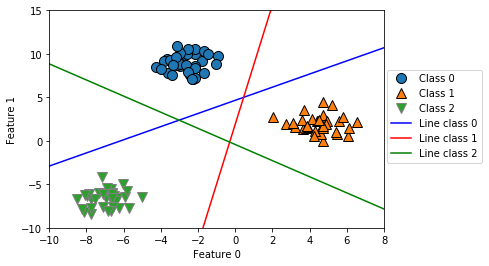

In [22]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

- All the points belonging to class 0 in the training data are above the
line corresponding to class 0, which means they are on the “class 0” side of this binary classifier.
- The points in class 0 are above the line corresponding to class 2, which
means they are classified as “rest” by the binary classifier for class 2.
- The points belonging to class 0 are to the left of the line corresponding to class 1, which means the binary classifier for class 1 also classifies them as “rest.” 
- Any point in this area will be classified as class 0 by the final classifier

For the triangle in the middle, the decision boundary will be as follows:

Text(0,0.5,'Feature 1')

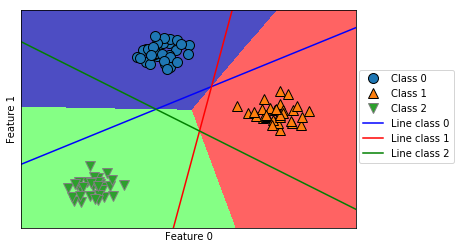

In [23]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")